In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def get_image_path(name):
    return f'./data/images/{name}.jpg'

def make_segment(image: np.array, *, window_size=64) -> np.array:
    y_size, x_size, *_ = image.shape
    x_start = (x_size - window_size) // 2
    x_end = x_start + window_size
    y_start = (y_size - window_size) // 2
    y_end = y_start + window_size
    return image[y_start:y_end, x_start:x_end]

In [3]:
truth_frame = pd.read_csv('./data/truth.csv')
truth_frame

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_0052060,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0052349,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0058510,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0073313,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0073502,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
10977,ISIC_9992485,IP_5202455,male,45.0,torso,nevus,benign,0
10978,ISIC_9996992,IP_9675066,male,40.0,upper extremity,unknown,benign,0
10979,ISIC_9997917,IP_6776978,female,60.0,upper extremity,unknown,benign,0
10980,ISIC_9998234,IP_8340768,male,60.0,torso,unknown,benign,0


In [4]:
truth_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10955 non-null  object 
 3   age_approx                     10952 non-null  float64
 4   anatom_site_general_challenge  10817 non-null  object 
 5   diagnosis                      10982 non-null  object 
 6   benign_malignant               10982 non-null  object 
 7   target                         10982 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 686.5+ KB


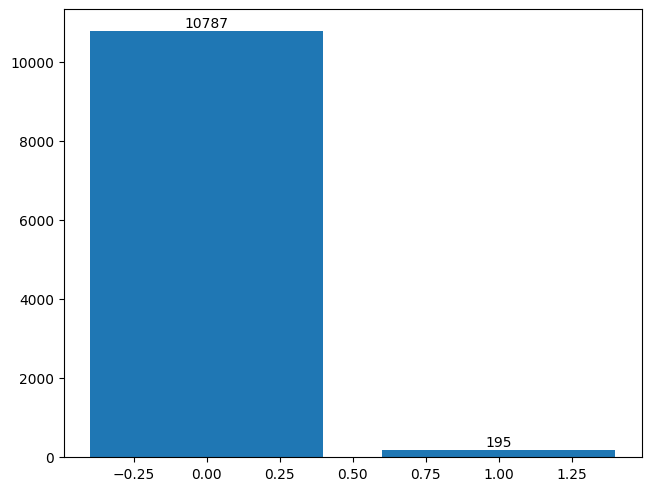

In [5]:
fig, ax = plt.subplots(layout='constrained')
frame = truth_frame.target.value_counts()
bars = ax.bar(frame.index, frame.values)
_ = ax.bar_label(bars)

In [6]:
positive = truth_frame.query('target == 1')
negative = truth_frame.query('target == 0').sample(n=positive.shape[0])
train = pd.concat([positive, negative])
train

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0198622,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0330886,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0408969,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0477986,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0528945,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
...,...,...,...,...,...,...,...,...
236,ISIC_0332421,IP_3246668,male,80.0,torso,unknown,benign,0
7919,ISIC_7186817,IP_0630349,male,60.0,torso,nevus,benign,0
9307,ISIC_8474376,IP_3054890,male,30.0,lower extremity,nevus,benign,0
4663,ISIC_4304252,IP_2842809,female,55.0,upper extremity,unknown,benign,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 91 to 2283
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     390 non-null    object 
 1   patient_id                     390 non-null    object 
 2   sex                            390 non-null    object 
 3   age_approx                     390 non-null    float64
 4   anatom_site_general_challenge  383 non-null    object 
 5   diagnosis                      390 non-null    object 
 6   benign_malignant               390 non-null    object 
 7   target                         390 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 27.4+ KB


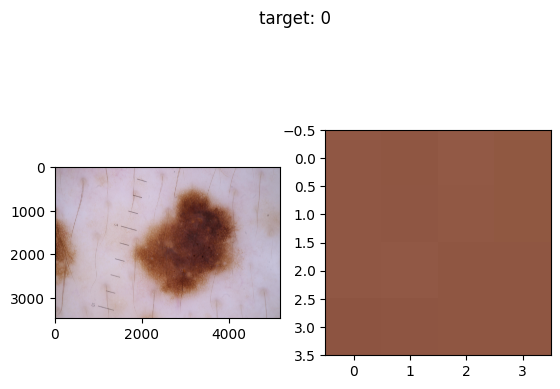

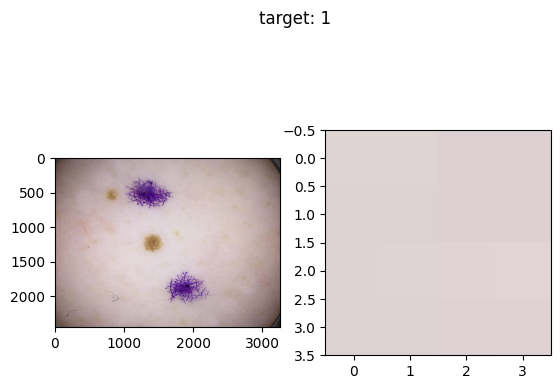

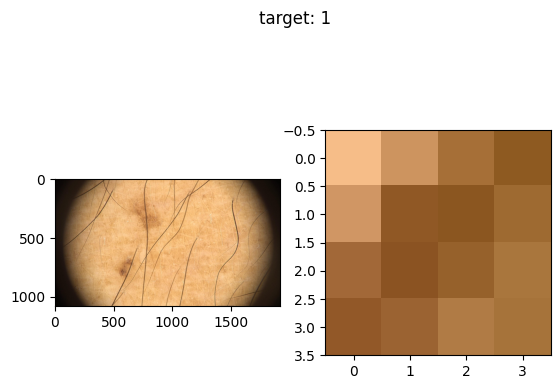

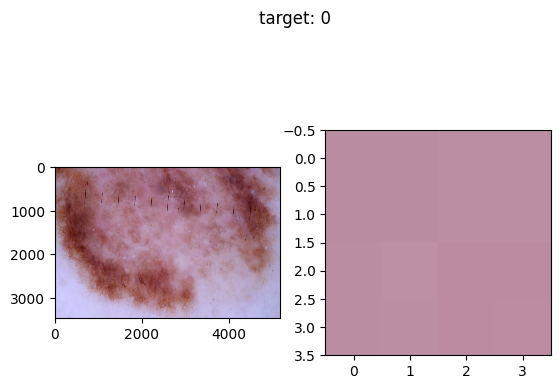

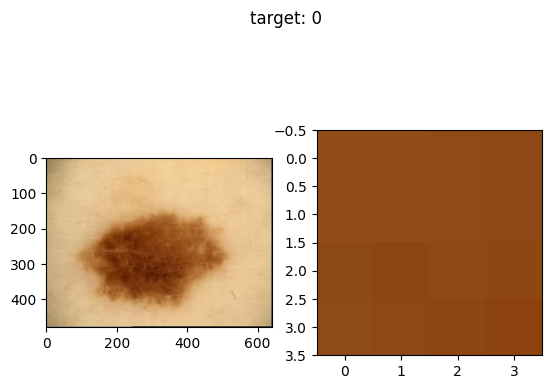

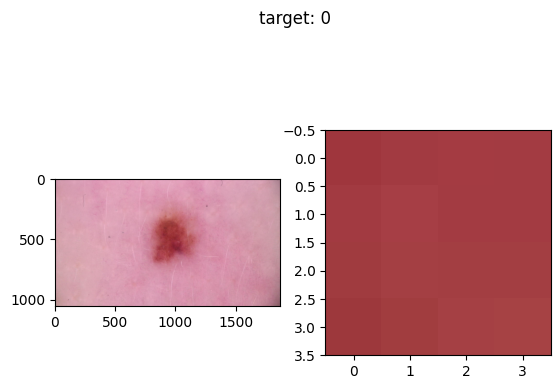

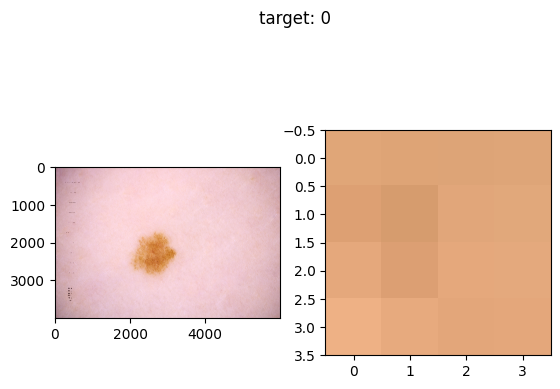

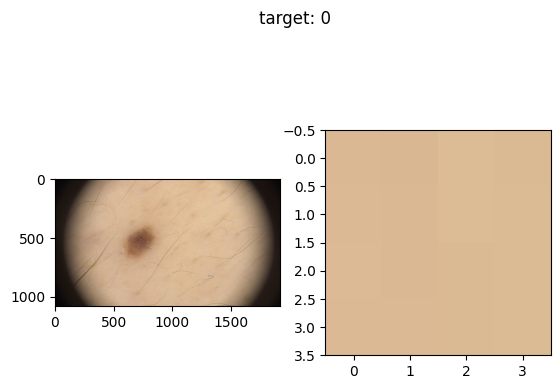

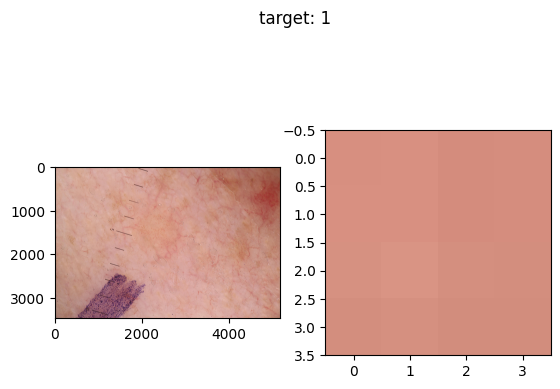

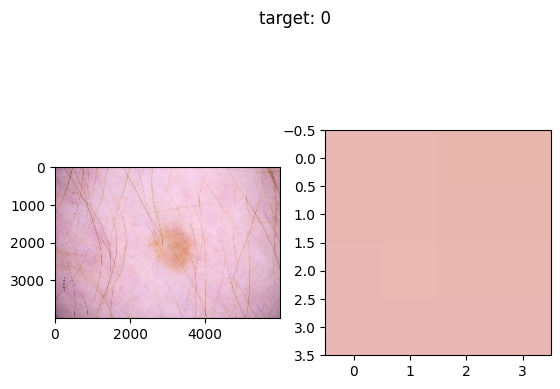

In [8]:
for index, row in train.sample(10).iterrows():
    fig, axes = plt.subplots(1, 2)
    image = skimage.io.imread(get_image_path(row.image_name))
    axes[0].imshow(image)
    segment_image = make_segment(image, window_size=4)
    axes[1].imshow(segment_image)
    fig.suptitle(f'target: {row.target}')

In [9]:
train_sample = train.sample(10)
segment_by_idx = {}

for idx, image_name in train_sample.image_name.items():
    image = skimage.io.imread(get_image_path(image_name))
    segment_by_idx[idx] = make_segment(image, window_size=4)

In [10]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 399 to 13
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10 non-null     object 
 1   patient_id                     10 non-null     object 
 2   sex                            10 non-null     object 
 3   age_approx                     10 non-null     float64
 4   anatom_site_general_challenge  9 non-null      object 
 5   diagnosis                      10 non-null     object 
 6   benign_malignant               10 non-null     object 
 7   target                         10 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 720.0+ bytes


In [11]:
train_with_features = pd.concat(
    [
        train_sample,
        pd.Series(segment_by_idx).rename('features')
    ],
    axis=1
)

In [12]:
train_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 399 to 13
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10 non-null     object 
 1   patient_id                     10 non-null     object 
 2   sex                            10 non-null     object 
 3   age_approx                     10 non-null     float64
 4   anatom_site_general_challenge  9 non-null      object 
 5   diagnosis                      10 non-null     object 
 6   benign_malignant               10 non-null     object 
 7   target                         10 non-null     int64  
 8   features                       10 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 800.0+ bytes


In [13]:
features_and_target = train_with_features.loc[:, ['features', 'target']].values
features = np.array([element.flatten() for element in features_and_target[:, 0]])
target = features_and_target[:, 1].astype('u1')

features, target

(array([[236, 178, 140, 237, 179, 141, 235, 177, 139, 235, 177, 139, 236,
         178, 140, 237, 179, 141, 234, 176, 138, 235, 177, 139, 237, 179,
         141, 237, 179, 141, 236, 178, 140, 236, 178, 140, 237, 179, 141,
         237, 179, 141, 236, 178, 140, 236, 178, 140],
        [236, 165, 121, 236, 166, 117, 235, 163, 115, 235, 163, 113, 235,
         166, 124, 237, 166, 120, 234, 164, 115, 233, 163, 112, 233, 166,
         124, 233, 164, 122, 235, 167, 120, 234, 166, 117, 236, 168, 129,
         235, 168, 125, 235, 168, 123, 234, 168, 120],
        [107,  64,  32, 109,  66,  32, 111,  68,  34, 103,  60,  26, 112,
          69,  35, 109,  66,  32, 112,  69,  35, 100,  57,  23, 115,  70,
          37, 110,  65,  32, 105,  60,  27,  96,  51,  18, 110,  65,  36,
         107,  62,  31,  96,  49,  19,  90,  45,  14],
        [234, 139, 109, 234, 139, 109, 231, 136, 106, 231, 136, 106, 232,
         139, 108, 232, 139, 106, 229, 136, 105, 230, 137, 104, 227, 137,
         103, 227, 13

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features, target)

for target_value, pred, prob in zip(target, knn.predict(features), knn.predict_proba(features)):
    print(target_value, pred, prob)

1 0 [0.66666667 0.33333333]
0 0 [0.66666667 0.33333333]
1 0 [0.66666667 0.33333333]
1 1 [0.33333333 0.66666667]
0 0 [0.66666667 0.33333333]
1 1 [0.33333333 0.66666667]
0 0 [0.66666667 0.33333333]
0 0 [0.66666667 0.33333333]
0 1 [0.33333333 0.66666667]
0 0 [0.66666667 0.33333333]
